In [1]:
import pandas as pd
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("../data/df_cleaned.parquet")
df.head()

,transaction_date,amount,memo,new_category,Cleaned Text
8,2018-03-06,15.25,POS CASINO BAR @ SPOTL - MEMO=PURCHASE 03/02 C...,Entertainment,pos casino bar spotl memopurchase 0302 coache...
39,2018-09-29,16.04,BEST BUY GRAND REGENCY BRANDON F,General Merchandise,best buy grand regency brandon f
45,2018-10-17,10.36,CORNER STORE ARLINGTON TX 10/17 Purchase $5.3...,Automotive,corner store arlington tx 1017 purchase $536 ...
52,2017-07-11,4.63,SPEEDWAY IN BEDFORD IN 07/10 DEBIT_CARD,Automotive,speedway bedford 0710 debitcard
55,2018-09-10,223.00,PAYMENT FOR AMZ STORECARD WEB ID: ACH_DEBIT,General Merchandise,payment amz storecard web id achdebit


In [3]:
out = pd.DataFrame([' '.join(df['Cleaned Text'])])
out

,0
0,pos casino bar spotl memopurchase 0302 coache...


In [4]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(out[0])
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzoundscom', 'zzp7jh', 'zzuzd'],
      dtype=object)

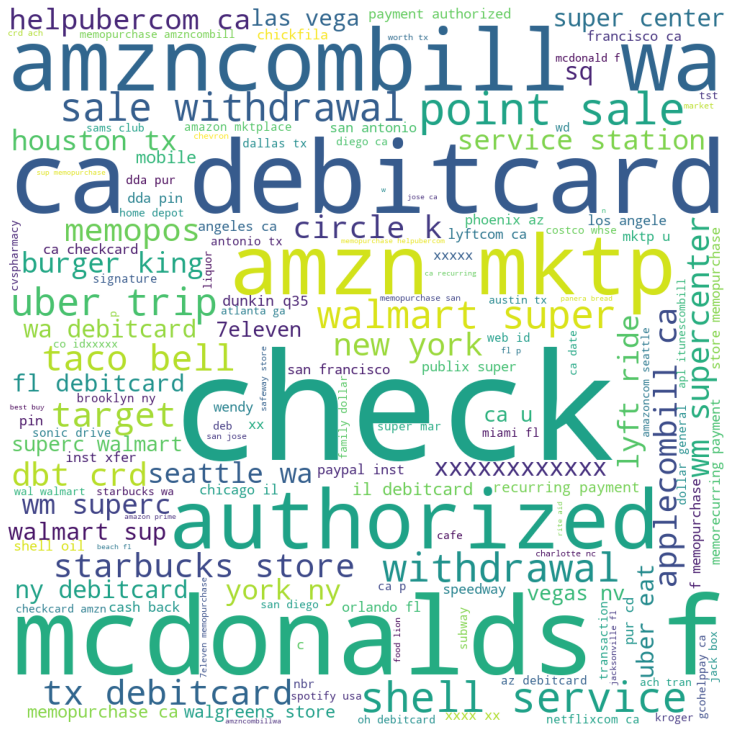

In [15]:
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords=['card','purchase','pos','visa','debit'],
                min_font_size = 10, max_words=150).generate_from_text(' '.join(df['Cleaned Text']))
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()